# Úkol č. 2 - Využití neuronových sítí

  * **Deadline je 13. 5. 2024, 23:59:59**, pokud odevzdáte úkol do 20. 5. 2024, 23:59:59, budete penalizování -12 body, pozdější odevzdání je bez bodu.
  * V rámci tohoto úkolu musíte sestrojit vhodný model neuronové sítě pro vícetřídou klasifikaci.
  * Část bodů získáte za správné vypracování a část bodů získáte za výslednou přesnost Vašeho modelu na evaluačních datech.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budou strhávány body.

## Zdroj dat

 * Zdrojem dat jsou soubory `train.csv` a `evaluate.csv`.
 * Jedná se o obrázky 32x32 pixelů ve stupních šedi, které byly nějakým způsobem vyrobeny z [Fashion Mnist datasetu](https://www.kaggle.com/datasets/zalando-research/fashionmnist).
 * Soubor `train.csv` obsahuje trénovací data.
 * Cílová (vysvětlovaná) proměnná se jmenuje **label**.
 * Soubor `evaluate.csv` obsahuje testovací data bez hodnot skutečných labelů.

## Pokyny k vypracování (max 18 bodů)

**Body zadání**, za jejichž (poctivé) vypracování získáte **18 bodů**:
  * V notebooku načtěte data ze souboru `train.csv`. Vhodným způsobem si je rozdělte na podmnožiny, které Vám poslouží pro trénování, porovnávání modelů a následnou predikci výkonnosti finálního modelu.
  * Proveďte základní průzkum dat a svá pozorování diskutujte. Některé obrázky také zobrazte.
  * Sestrojte a natrénujte několik variant modelu dopředné neuronové sítě. Přitom v rámci výpočetních možností:
      * Okomentujte vhodnost daného modelu pro daný typ úlohy.
      * Experimentujte s různými hloubkami a velikosmi vrstev.
      * Experimentujte se standardizací/normalizací dat.
      * Experimentujte s různými optimalizačními metodami.
      * Experimentujte s různými regularizačními technikami.
      * Získané výsledky vždy řádně okomentujte.

  * Sestrojte model konvoluční neuronové sítě. Přitom v rámci výpočetních možností:
      * Okomentujte vhodnost daného modelu pro daný typ úlohy.
      * Experimentujte s různými hloubkami a velikosmi vrstev.
      * Experimentujte se standardizací/normalizací dat.
      * Experimentujte s různými optimalizačními metodami.
      * Experimentujte s různými regularizačními technikami.
      * Získané výsledky vždy řádně okomentujte.
    
  * Ze všech zkoušených možností vyberte finální model a odhadněte, jakou přesnost můžete očekávat na nových datech, která jste doposud neměli k dispozici.
  
  * Nakonec načtěte vyhodnocovací data ze souboru`evaluate.csv`. Pomocí finálního modelu napočítejte predikce pro tyto data (vysvětlovaná proměnná v nich již není). Vytvořte soubor `results.csv`, ve kterém získané predikce uložíte do sloupce **label** a identifikátory do sloupce **ID**. Tento soubor též odevzdejte (uložte do projektu vedle notebooku).
   
   * Ukázka prvních řádků souboru `results.csv`:
  
```
ID,label
0,0
1,1
...
```

## Vyhodnocovací část (max 7 bodů)
Za přesnost (accuraccy) na odevzdaných predikcích pro vyhodnocovací množnu získáte dalších max **7 bodů**.

Označíme-li $A$ přesnost, které jste dosáhli, zaokrouhlenou na 2 desetinná místa, akumulují se výsledné body podle následujících pravidel:
* pokud $A \geq 0.80$ obdržíte +1 bod
* pokud $A \geq 0.83$ obdržíte +1 bod
* pokud $A \geq 0.86$ obdržíte +1 bod
* pokud $A \geq 0.87$ obdržíte +1 bod
* pokud $A \geq 0.88$ obdržíte +1 bod
* pokud $A \geq 0.89$ obdržíte +1 bod
* pokud $A \geq 0.90$ obdržíte +1 bod

**Příklad:** Pokud bude Vaše přesnost 0.856, vyjde A = 0.86 a vy získáte 3 body.


## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML2/homeworks/index.html.
  * Vytvořte i csv soubor `results.csv` s predikcemi a uložte ho v rámci projektu vedle ipython notebooku.

### Odtud uz je to vase
Nejprve si nactu data a udelam zakladni prehled, abych vedel vlastne s jakymi daty budu pracovat.


In [169]:
import numpy as np
import pandas as pd

In [170]:
data_frame = pd.read_csv('train.csv')

In [171]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52500 entries, 0 to 52499
Columns: 1025 entries, pix1 to label
dtypes: int64(1025)
memory usage: 410.6 MB


In [172]:
data_frame.head()

,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,pix10,...,pix1016,pix1017,pix1018,pix1019,pix1020,pix1021,pix1022,pix1023,pix1024,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,3
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,7
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,5


In [173]:
uniq_label =data_frame['label'].unique().tolist()
uniq_label


[3, 7, 9, 5, 1, 6, 0, 4, 8, 2]

In [174]:
print(len(data_frame))
print(data_frame.shape)
print(data_frame.mean())

52500
(52500, 1025)
pix1       0.877390
pix2       0.877390
pix3       0.877390
pix4       0.877390
pix5       0.877410
             ...   
pix1021    0.877467
pix1022    0.877410
pix1023    0.877390
pix1024    0.877390
label      4.509752
Length: 1025, dtype: float64


In [175]:
import matplotlib.pyplot as plt

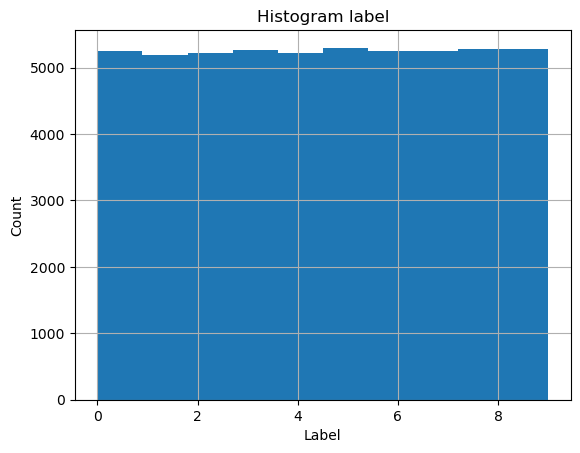

In [176]:
data_frame['label'].hist()
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Histogram label')
plt.show()

Provedl jsem zakladni praci pro prehled dat, dale jsem si vykreslil zastoupeni jednotlivych "labels" a  muzeme usoudit, ze zastoupeni jednotlivych labels je dosti stejne.

Ted si vykreslime nekolik obrazku, abychom valstne vedeli s cim pracujeme.

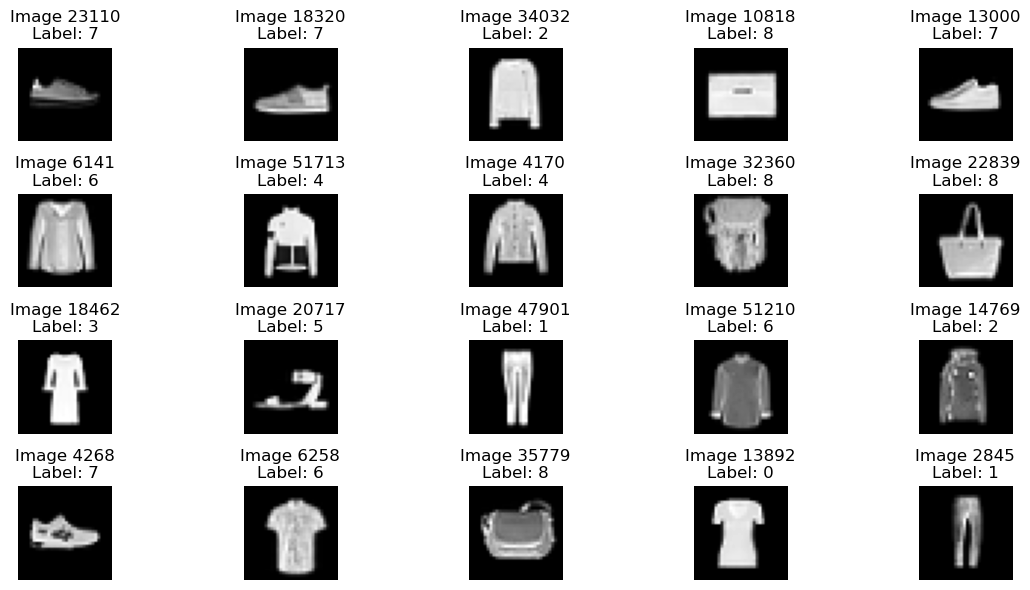

In [177]:
data_frame_np = data_frame.drop(columns=['label']).to_numpy()

import random

num_img = 20
random_index = random.sample(range(len(data_frame_np)), num_img)

plt.figure(figsize=(12, 6))
for i, idx in enumerate(random_index):
    plt.subplot(4, 5, i+1)
    plt.imshow(data_frame_np[idx].reshape((32, 32)), cmap='gray')
    plt.axis('off')
    original_label = data_frame.loc[idx, 'label']
    plt.title(f'Image {idx}\nLabel: {original_label}')

plt.tight_layout()
plt.show()

Zacneme s doprednou neuronovou siti. Jsou casto pouzivane pro klasifikaci a a regresi, jsou velmi dobre schopne zachytit slozite vztahy mezi vstupnimi a vystupnimi daty.

Rozdelime si data se kterymi budeme dale pracovat

In [178]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, random_split
from torchvision import transforms


In [179]:
data_frame_numpy = data_frame.to_numpy()

generator1 = torch.Generator().manual_seed(42)
train_size = int(0.6*len(data_frame_numpy))
val_size = int(0.2*len(data_frame_numpy))
test_size = len(data_frame_numpy) - train_size - val_size

train_data, val_data, test_data = torch.utils.data.random_split(data_frame_numpy, [train_size, val_size, test_size],generator1)

print("Velikost trénovací množiny:", len(train_data))
print("Velikost validační množiny:", len(val_data))
print("Velikost testovací množiny:", len(test_data))


Velikost trénovací množiny: 31500
Velikost validační množiny: 10500
Velikost testovací množiny: 10500


Dale si pripravim "davky" pro davkove uceni

In [180]:
class CustomDataset(Dataset):
    def __init__(self, dataset, indices):
        self.data = torch.from_numpy(dataset[indices, :-1]).float()  # Features
        self.labels = torch.from_numpy(dataset[indices, -1]).long()  # Labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

In [181]:
train_dataset = CustomDataset(data_frame_numpy, train_data.indices)
val_dataset = CustomDataset(data_frame_numpy, val_data.indices)
test_dataset = CustomDataset(data_frame_numpy, test_data.indices)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Ted si pripravime nejprve jednoduchy model dopredne neuronove site 

In [182]:
class firstNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(firstNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = x.view(x.size(0), -1)  
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [183]:
def run_model(model, criterion, optimizer, train_loader, val_loader, test_loader):
    num_epochs = 10
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
        epoch_loss = running_loss / len(train_loader.dataset)

        model.eval()
        val_running_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                val_running_loss += loss.item() * inputs.size(0)
        val_epoch_loss = val_running_loss / len(val_loader.dataset)
        val_accuracy = correct / total

        print(f'Epoch [{epoch+1}/{num_epochs}], '
              f'Training Loss: {epoch_loss:.4f}, '
              f'Validation Loss: {val_epoch_loss:.4f}, '
              f'Validation Accuracy: {val_accuracy:.4f}')

    model.eval()
    test_running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            test_running_loss += loss.item() * inputs.size(0)
    test_loss = test_running_loss / len(test_loader.dataset)
    test_accuracy = correct / total

    print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

In [184]:
model_one = firstNN(input_size=32*32, hidden_size=228, output_size=10)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_one.parameters(), lr=0.0001)
run_model(model_one,criterion,optimizer,train_loader,val_loader,test_loader)

Epoch [1/10], Training Loss: 2.2483, Validation Loss: 1.3676, Validation Accuracy: 0.7115
Epoch [2/10], Training Loss: 1.0433, Validation Loss: 1.0634, Validation Accuracy: 0.7232
Epoch [3/10], Training Loss: 0.7953, Validation Loss: 0.8165, Validation Accuracy: 0.7680
Epoch [4/10], Training Loss: 0.6879, Validation Loss: 0.7821, Validation Accuracy: 0.7710
Epoch [5/10], Training Loss: 0.5870, Validation Loss: 0.7105, Validation Accuracy: 0.7868
Epoch [6/10], Training Loss: 0.5502, Validation Loss: 0.6916, Validation Accuracy: 0.7900
Epoch [7/10], Training Loss: 0.4974, Validation Loss: 0.6605, Validation Accuracy: 0.7978
Epoch [8/10], Training Loss: 0.4532, Validation Loss: 0.6429, Validation Accuracy: 0.8010
Epoch [9/10], Training Loss: 0.4338, Validation Loss: 0.6178, Validation Accuracy: 0.8085
Epoch [10/10], Training Loss: 0.4048, Validation Loss: 0.5982, Validation Accuracy: 0.8176
Test Loss: 0.2963, Test Accuracy: 0.8150


U tohoto modelu jsem experimentoval nejvice s hodnotou "lr" a prave lr = 0.0001 mi vysla jako nejvice optimalni.Pro odlisne (mensi jak 128) hloubky skrytych hloubbek jsem dostaval mensi presnost, pro hodnoty vetsi jak 128 se presnost zvetsovala ale od 128 je lehce, proto nechavam u tohoto modelu 228. Vstup je 1024 coz odpovida pixelum u obrazku a vystupni vrstva ma 10. Jeste vyzkouskim jinym pristup u dopredne neuronovou site. U tohoto modelu mi presnost vicemen vychazi okolo 80%, pokusime se udelat lepsi model. 

In [185]:
class secondCNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(secondCNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

In [186]:
model_two = secondCNN(input_size=32*32, hidden_size1=556,hidden_size2=228, output_size=10)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_one.parameters(), lr=0.00001)
run_model(model_one,criterion,optimizer,train_loader,val_loader,test_loader)

Epoch [1/10], Training Loss: 0.2978, Validation Loss: 0.5455, Validation Accuracy: 0.8285
Epoch [2/10], Training Loss: 0.2799, Validation Loss: 0.5620, Validation Accuracy: 0.8246
Epoch [3/10], Training Loss: 0.2733, Validation Loss: 0.5465, Validation Accuracy: 0.8290
Epoch [4/10], Training Loss: 0.2670, Validation Loss: 0.5433, Validation Accuracy: 0.8294
Epoch [5/10], Training Loss: 0.2622, Validation Loss: 0.5420, Validation Accuracy: 0.8308
Epoch [6/10], Training Loss: 0.2575, Validation Loss: 0.5520, Validation Accuracy: 0.8314
Epoch [7/10], Training Loss: 0.2541, Validation Loss: 0.5469, Validation Accuracy: 0.8295
Epoch [8/10], Training Loss: 0.2483, Validation Loss: 0.5457, Validation Accuracy: 0.8300
Epoch [9/10], Training Loss: 0.2452, Validation Loss: 0.5455, Validation Accuracy: 0.8330
Epoch [10/10], Training Loss: 0.2430, Validation Loss: 0.5549, Validation Accuracy: 0.8276
Test Loss: 0.4170, Test Accuracy: 0.8209


Zde jsem take experimentoval nejvice s hodnotou "lr", hodnota pro lr- 0.00001 mi davala nejlepsi vysledky pro model a odhad je okolo 82%. Zde jsem opet zkousel nekolik ruznych variant pro skryte vrstvy a nejlepe jsem dostal na hodnotach 556 a 258 s presnosti 83%.

Uvedu zde jeste treti model

In [187]:
class ThirdNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, output_size):
        super(ThirdNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_size3, output_size)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        return x

In [188]:
model_three = ThirdNN(input_size=32*32, hidden_size1=556,hidden_size2=228,hidden_size3=228, output_size=10)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_one.parameters(), lr=0.00001)
run_model(model_one,criterion,optimizer,train_loader,val_loader,test_loader)

Epoch [1/10], Training Loss: 0.2389, Validation Loss: 0.5485, Validation Accuracy: 0.8315
Epoch [2/10], Training Loss: 0.2350, Validation Loss: 0.5466, Validation Accuracy: 0.8314
Epoch [3/10], Training Loss: 0.2311, Validation Loss: 0.5471, Validation Accuracy: 0.8324
Epoch [4/10], Training Loss: 0.2284, Validation Loss: 0.5478, Validation Accuracy: 0.8335
Epoch [5/10], Training Loss: 0.2248, Validation Loss: 0.5466, Validation Accuracy: 0.8345
Epoch [6/10], Training Loss: 0.2225, Validation Loss: 0.5459, Validation Accuracy: 0.8330
Epoch [7/10], Training Loss: 0.2191, Validation Loss: 0.5519, Validation Accuracy: 0.8345
Epoch [8/10], Training Loss: 0.2170, Validation Loss: 0.5467, Validation Accuracy: 0.8344
Epoch [9/10], Training Loss: 0.2127, Validation Loss: 0.5496, Validation Accuracy: 0.8340
Epoch [10/10], Training Loss: 0.2108, Validation Loss: 0.5538, Validation Accuracy: 0.8321
Test Loss: 0.0712, Test Accuracy: 0.8220


U teto metody jsem dostal o neco vetsi presnost, ale testovaci chyba byla vetsi nez u predchoziho modelu. Zkousel jsem ruzne velikosti skrytych vrstev, ale tyto parametry mi vysly jako nejlepsi.

Prejdeme ted na konvolucni neronovo sit, CNN jsou velmi schopne pro odhaleni lekolnich vzoru diky lokalnim filtrum. Pouzivaji se momentalne hojne, protoze jsou schopny zachytit hieararchicke struktury vizualnich dat. Jsou casto pouzite pro rozpoznavani objektu/obrazu.

In [189]:
import torch
from sklearn.model_selection import train_test_split

data_np = data_frame.to_numpy()


features_np = data_np[:, :-1]  
labels_np = data_np[:, -1]     


features_tensor = torch.tensor(features_np, dtype=torch.float32)
labels_tensor = torch.tensor(labels_np, dtype=torch.long)


batch_size = 32 
channels = 1  
height = 32
width = 32


features_tensor = features_tensor.view(-1, channels, height, width)


X_train_val, X_test, y_train_val, y_test = train_test_split(features_tensor, labels_tensor, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2


from torch.utils.data import DataLoader, TensorDataset

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = TensorDataset(X_val, y_val)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


print("Velikost trénovacích dat:", len(train_loader.dataset))
print("Velikost validačních dat:", len(val_loader.dataset))
print("Velikost testovacích dat:", len(test_loader.dataset))


Velikost trénovacích dat: 31500
Velikost validačních dat: 10500
Velikost testovacích dat: 10500


In [190]:
import torch.nn as nn
import torch.nn.functional as F

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 8 * 8, 128)  
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)  
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

Sestrojim si funkci podobnou jako predtim na testovani dat.

In [191]:
def run_model_two(model, criterion, optimizer, train_loader, val_loader, test_loader, num_epochs=10):
    for epoch in range(num_epochs):

        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
        epoch_loss = running_loss / len(train_loader.dataset)


        model.eval()
        val_running_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                val_running_loss += loss.item() * inputs.size(0)
        val_epoch_loss = val_running_loss / len(val_loader.dataset)
        val_accuracy = correct / total

        print(f'Epoch [{epoch+1}/{num_epochs}], '
              f'Training Loss: {epoch_loss:.4f}, '
              f'Validation Loss: {val_epoch_loss:.4f}, '
              f'Validation Accuracy: {val_accuracy:.4f}')

 
    model.eval()
    test_running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            test_running_loss += loss.item() * inputs.size(0)
    test_loss = test_running_loss / len(test_loader.dataset)
    test_accuracy = correct / total

    print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

In [192]:
model = ConvNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

run_model_two(model, criterion, optimizer, train_loader, val_loader, test_loader)

Epoch [1/10], Training Loss: 0.6797, Validation Loss: 0.4834, Validation Accuracy: 0.8178
Epoch [2/10], Training Loss: 0.4282, Validation Loss: 0.3966, Validation Accuracy: 0.8550
Epoch [3/10], Training Loss: 0.3594, Validation Loss: 0.3659, Validation Accuracy: 0.8630
Epoch [4/10], Training Loss: 0.3185, Validation Loss: 0.4115, Validation Accuracy: 0.8513
Epoch [5/10], Training Loss: 0.2827, Validation Loss: 0.3406, Validation Accuracy: 0.8743
Epoch [6/10], Training Loss: 0.2531, Validation Loss: 0.3586, Validation Accuracy: 0.8704
Epoch [7/10], Training Loss: 0.2266, Validation Loss: 0.3368, Validation Accuracy: 0.8785
Epoch [8/10], Training Loss: 0.2045, Validation Loss: 0.3505, Validation Accuracy: 0.8770
Epoch [9/10], Training Loss: 0.1830, Validation Loss: 0.3267, Validation Accuracy: 0.8883
Epoch [10/10], Training Loss: 0.1625, Validation Loss: 0.3557, Validation Accuracy: 0.8768
Test Loss: 0.3632, Test Accuracy: 0.8795


U tohoto modelu jsem experimentoval s nekolika zakldnimi funkcemi a modely dat, tato kombinace mi vysla jako nejvice efektivni a ocekvany vysledek 88% presnosti je velmi uspokojujici., tento model pouziji na finalni data a pro jejich odhad. Ocekavam presnost okolo 88%

Dale si model aplikuji na finalni data ty potom nahraji do finalniho csv souboru.

In [193]:
final_data  = pd.read_csv('evaluate.csv')
final_data_np = data_frame.to_numpy()


features_np = data_np[:, :-1]
labels_np = data_np[:, -1]


features_tensor = torch.tensor(features_np, dtype=torch.float32)



batch_size = 32
channels = 1
height = 32
width = 32


features_tensor = features_tensor.view(-1, channels, height, width)


In [196]:
model.eval()
with torch.no_grad():
    predicts = model(features_tensor)

predicted_classes = torch.argmax(predicts,dim=1)
print(predicted_classes)

tensor([3, 3, 7,  ..., 9, 2, 3])


In [197]:
import csv

predicted_classes = [label.item() for label in predicted_classes]
ids = list(range(len(predicted_classes)))
results = list(zip(ids, predicted_classes))

with open('results.csv','w',newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['ID','label'])
    writer.writerows(results)